In [2]:
from sklearn.neural_network import MLPClassifier
from  keras.wrappers.scikit_learn  import  KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from scipy import ndimage
from sklearn.ensemble import AdaBoostClassifier
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

In [3]:
df_test  = pd.read_csv('/Users/Michael Scott/Desktop/shopee-product-matching/test.csv')
df_train  = pd.read_csv('/Users/Michael Scott/Desktop/shopee-product-matching/train.csv')
df_trains  = pd.read_csv('/Users/Michael Scott/Desktop/shopee-product-matching/train_sample.csv')
df_test.head()
feature_cols = ['posting_id','image','image_phash','title']
y = df_trains['label_group']
X = df_train[feature_cols]
#y_trains = df_trains['label_group']

In [4]:
train_files = []
y_train = []
image_width = 640
image_height = 640
i=0
image_path = '/Users/Michael Scott/Desktop/shopee-product-matching/train_samples/' + df_trains['image']

In [5]:
for m in range(len(df_trains)):
    img = Image.open(image_path[m]).convert('RGBA')
    img = img.resize((image_width, image_height))
    filled_arr = np.array(img)
    oneD_arr = filled_arr.ravel()
    train_files.append(oneD_arr)

print(train_files[0])

[168  98 108 ... 114 134 255]


In [6]:
normalized = preprocessing.scale(train_files)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(normalized, y, test_size=0.3, random_state=2)

In [8]:
from   sklearn.ensemble    import    RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train, y_train)
y_predict_rf = my_RandomForest.predict(X_test)

score_rf = accuracy_score(y_test, y_predict_rf)

y_predict_rf_proba = my_RandomForest.predict_proba(X_test)

fpr4, tpr4, thresholds = metrics.roc_curve(y_test, y_predict_rf_proba[:,1], pos_label=1)
rf_AUC = metrics.auc(fpr4, tpr4)
print("Random Forest accuracy: ")
print(score_rf)
print("Random Forest AUC: ")
print(rf_AUC)

Random Forest accuracy: 
0.05405405405405406
Random Forest AUC: 
nan


C:\Users\Michael Scott\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [9]:
from   xgboost   import   XGBClassifier

my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)
my_XGBoost.fit(X_train, y_train)
y_XGBoost_predict = my_XGBoost.predict(X_test)
xG_score = accuracy_score(y_test, y_XGBoost_predict)

y_predict_xg_proba = my_XGBoost.predict_proba(X_test)

fpr3, tpr3, thresholds = metrics.roc_curve(y_test, y_predict_xg_proba[:,1], pos_label=1)

xg_AUC=metrics.auc(fpr3, tpr3)


print("XGBoost accuracy: ")
print(xG_score)
print("XGBoost AUC: ")
print(xg_AUC)

C:\Users\Michael Scott\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:58:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy: 
0.05405405405405406
XGBoost AUC: 
nan


In [10]:
from   sklearn.ensemble   import     AdaBoostClassifier

my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(X_train, y_train)
y_AdaBoost_predict = my_AdaBoost.predict(X_test)
adaBoost_score = accuracy_score(y_test, y_AdaBoost_predict)

y_predict_ada_proba = my_AdaBoost.predict_proba(X_test)

fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_predict_ada_proba[:,1], pos_label=1)

ada_AUC = metrics.auc(fpr2, tpr2)

print("Ada accuracy: ")
print(adaBoost_score)
print("Ada AUC: ")
print(ada_AUC)

Ada accuracy: 
0.0
Ada AUC: 
nan


C:\Users\Michael Scott\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [11]:
from sklearn.neural_network import MLPClassifier
my_ANN = MLPClassifier(hidden_layer_sizes=(30,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.02, verbose=True, tol=0.0001)

In [13]:
my_ANN = MLPClassifier(hidden_layer_sizes=(30,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.02, verbose=True, tol=0.0001)

In [14]:
my_ANN.fit(X_train, y_train)

Iteration 1, loss = 32.06585749
Iteration 2, loss = 92.64918108
Iteration 3, loss = 96.03986236
Iteration 4, loss = 62.41232448
Iteration 5, loss = 38.59468300
Iteration 6, loss = 25.94600396
Iteration 7, loss = 22.85831817
Iteration 8, loss = 24.38198026
Iteration 9, loss = 23.46992652
Iteration 10, loss = 22.01164526
Iteration 11, loss = 20.38339132
Iteration 12, loss = 17.43001335
Iteration 13, loss = 15.36185030
Iteration 14, loss = 14.79178218
Iteration 15, loss = 14.20033917
Iteration 16, loss = 13.61720279
Iteration 17, loss = 12.93795538
Iteration 18, loss = 11.88496202
Iteration 19, loss = 11.18501865
Iteration 20, loss = 11.03283696
Iteration 21, loss = 10.64494887
Iteration 22, loss = 9.85867270
Iteration 23, loss = 9.45714477
Iteration 24, loss = 9.46083705
Iteration 25, loss = 9.26219148
Iteration 26, loss = 8.63140335
Iteration 27, loss = 8.43274301
Iteration 28, loss = 8.80794658
Iteration 29, loss = 8.84528716
Iteration 30, loss = 8.26583490
Iteration 31, loss = 8.17741

MLPClassifier(activation='logistic', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.02, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
accuracy_list = cross_val_score(my_ANN, X_train, y_train, cv=3, scoring='accuracy')

C:\Users\Michael Scott\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Iteration 1, loss = 3.44373411
Iteration 2, loss = 565.67667468
Iteration 3, loss = 841.09722642
Iteration 4, loss = 1045.86870955
Iteration 5, loss = 1099.05029381
Iteration 6, loss = 971.91029018
Iteration 7, loss = 773.07151725
Iteration 8, loss = 596.15099977
Iteration 9, loss = 472.19546468
Iteration 10, loss = 379.61025823
Iteration 11, loss = 296.10421918
Iteration 12, loss = 225.37718079
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 33.10538757
Iteration 2, loss = 92.85313656
Iteration 3, loss = 94.45810610
Iteration 4, loss = 60.16113701
Iteration 5, loss = 36.78387143
Iteration 6, loss = 25.40670392
Iteration 7, loss = 22.68952919
Iteration 8, loss = 24.50647292
Iteration 9, loss = 23.66092102
Iteration 10, loss = 21.24923776
Iteration 11, loss = 19.60355008
Iteration 12, loss = 17.67858874
Iteration 13, loss = 15.84255730
Iteration 14, loss = 14.00352312
Iteration 15, loss = 12.17986342
Iteration 16, loss = 11.6

In [19]:
my_ANN.fit(X_test, y_test)

Iteration 1, loss = 5.10484941
Iteration 2, loss = 66.42639908
Iteration 3, loss = 108.21185087
Iteration 4, loss = 142.63797446
Iteration 5, loss = 155.53106548
Iteration 6, loss = 146.22521884
Iteration 7, loss = 127.06773060
Iteration 8, loss = 107.30431702
Iteration 9, loss = 89.59288700
Iteration 10, loss = 72.85971127
Iteration 11, loss = 57.26337846
Iteration 12, loss = 44.61543209
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.02, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [23]:
accuracy_list = cross_val_score(my_ANN, X_test, y_test, cv=2, scoring='accuracy')

C:\Users\Michael Scott\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


Iteration 1, loss = 3.83845115
Iteration 2, loss = 1931.24517141
Iteration 3, loss = 1859.17200237
Iteration 4, loss = 1693.87560665
Iteration 5, loss = 1507.03368828
Iteration 6, loss = 1079.34850420
Iteration 7, loss = 638.16044547
Iteration 8, loss = 408.68494959
Iteration 9, loss = 420.25414976
Iteration 10, loss = 514.70111987
Iteration 11, loss = 537.03400587
Iteration 12, loss = 470.55015898
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 5.10815989
Iteration 2, loss = 68.68781864
Iteration 3, loss = 111.17739197
Iteration 4, loss = 145.67832748
Iteration 5, loss = 157.91952889
Iteration 6, loss = 147.35180833
Iteration 7, loss = 127.00434834
Iteration 8, loss = 106.44469723
Iteration 9, loss = 88.32524322
Iteration 10, loss = 71.29662001
Iteration 11, loss = 55.45469493
Iteration 12, loss = 42.81217792
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [24]:
accuracy_cv = accuracy_list.mean()
print('The accuracy on the testing set is :')
print(accuracy_cv)

The accuracy on the testing set is :
0.2


In [25]:
from sklearn.model_selection import GridSearchCV

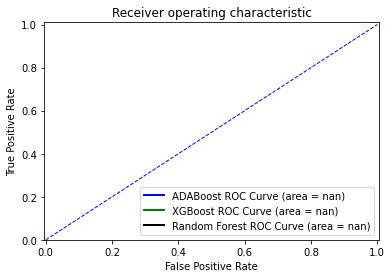

In [31]:
plt.figure()

# Roc Curve:
#plt.plot(fpr, tpr, color='purple', lw=2, 
#         label='Decision tree ROC Curve (area = %0.2f)' % dt_AUC)
#plt.plot(fpr1, tpr1, color='red', lw=2, 
#         label='Bagging ROC Curve (area = %0.2f)' % AUC)
plt.plot(fpr2, tpr2, color='blue', lw=2, 
         label='ADABoost ROC Curve (area = %0.2f)' % ada_AUC)
plt.plot(fpr3, tpr3, color='green', lw=2, 
         label='XGBoost ROC Curve (area = %0.2f)' % xg_AUC)
plt.plot(fpr4, tpr4, color='black', lw=2, 
         label='Random Forest ROC Curve (area = %0.2f)' % rf_AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')


# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [34]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10

In [33]:
seed = 1

In [35]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

KeyboardInterrupt: 

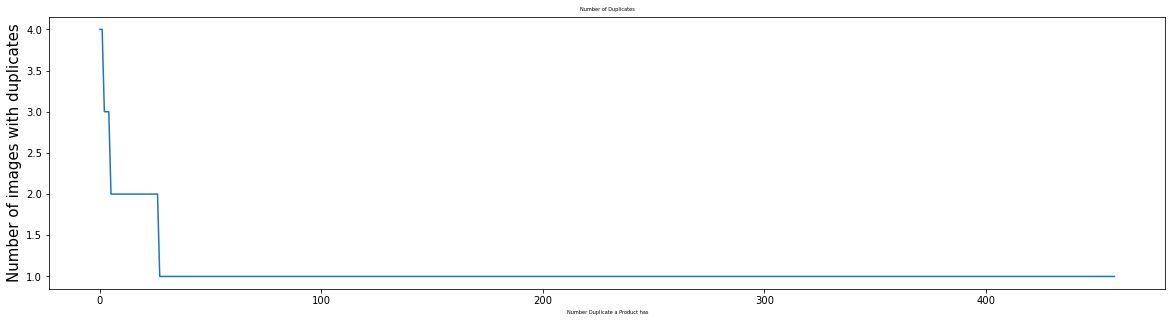

In [39]:
groups = df_trains['label_group'].value_counts()

plt.figure(figsize = (20, 5))
plt.plot(np.arange(len(groups)),groups.values)
plt.title('Number of Duplicates',size = 5)
plt.ylabel('Number of images with duplicates', size = 15)
plt.xlabel('Number Duplicate a Product has', size = 5)
plt.show()